In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import f_oneway
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Carga de datos

In [ ]:
#cargamos los datos
df = pd.read_csv("/content/heart_2020_cleaned.csv")

df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Seleccion de variables

In [ ]:
#Pasamos las columnas tipo object a category
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['Smoking'] = df['Smoking'].astype('category')
df['AlcoholDrinking'] = df['AlcoholDrinking'].astype('category')
df['Stroke'] = df['Stroke'].astype('category')
df['DiffWalking'] = df['DiffWalking'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['AgeCategory'] = df['AgeCategory'].astype('category')
df['Race'] = df['Race'].astype('category')
df['Diabetic'] = df['Diabetic'].astype('category')
df['PhysicalActivity'] = df['PhysicalActivity'].astype('category')
df['GenHealth'] = df['GenHealth'].astype('category')
df['Asthma'] = df['Asthma'].astype('category')
df['KidneyDisease'] = df['KidneyDisease'].astype('category')
df['SkinCancer'] = df['SkinCancer'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  category
 1   BMI               319795 non-null  float64 
 2   Smoking           319795 non-null  category
 3   AlcoholDrinking   319795 non-null  category
 4   Stroke            319795 non-null  category
 5   PhysicalHealth    319795 non-null  float64 
 6   MentalHealth      319795 non-null  float64 
 7   DiffWalking       319795 non-null  category
 8   Sex               319795 non-null  category
 9   AgeCategory       319795 non-null  category
 10  Race              319795 non-null  category
 11  Diabetic          319795 non-null  category
 12  PhysicalActivity  319795 non-null  category
 13  GenHealth         319795 non-null  category
 14  SleepTime         319795 non-null  float64 
 15  Asthma            319795 non-null  category
 16  Ki

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


## Estadistica Descriptiva

In [ ]:
# Crear el perfil de pandas profiling
profile = ProfileReport(df, title="Pandas Profiling Report - Heart Disease", explorative=True)

# Ver en notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:03<00:00,  5.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("\nForma del dataset:", df.shape)



Forma del dataset: (319795, 18)


In [ ]:
#Describimos variables numericas
df.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


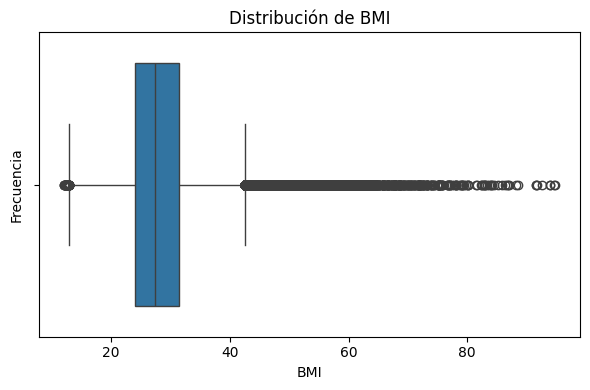

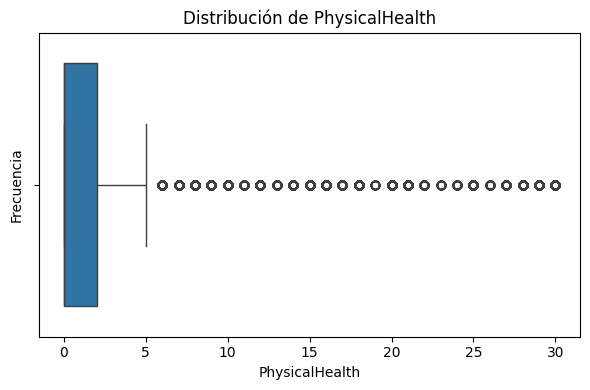

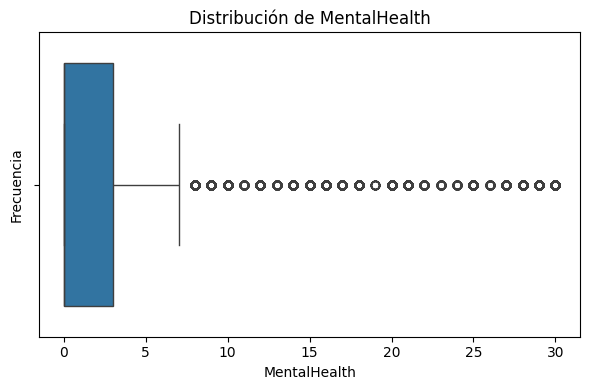

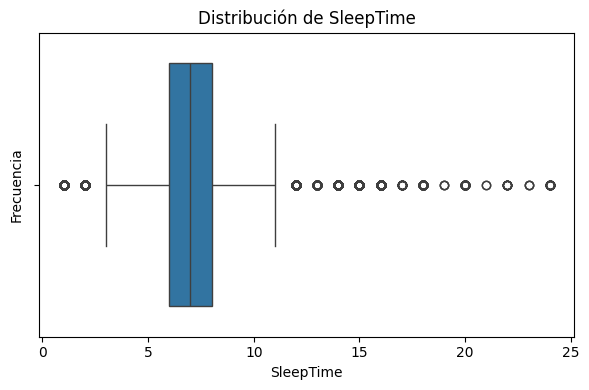

In [ ]:
#BoxPlot para las numericas
num_cols = df.select_dtypes(include='float64').columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [ ]:
#Describimos variables categoricas
df.describe(include='category').T


,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


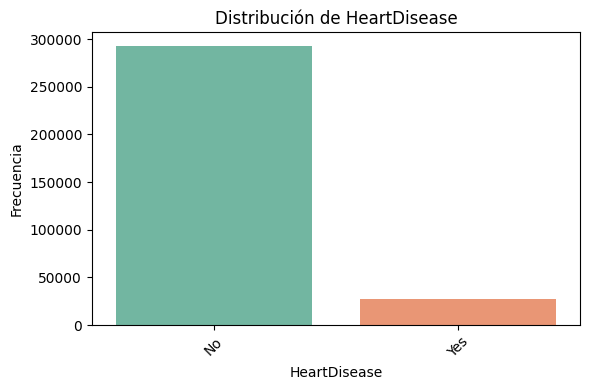

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


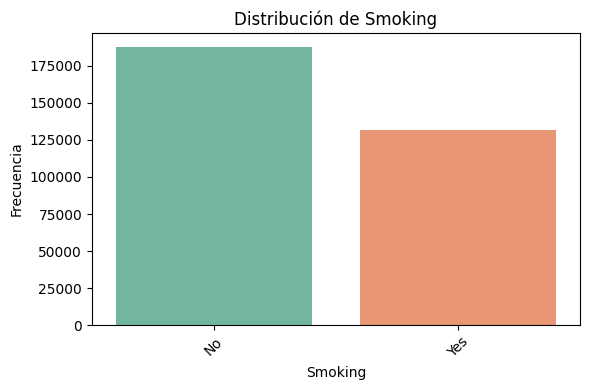

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


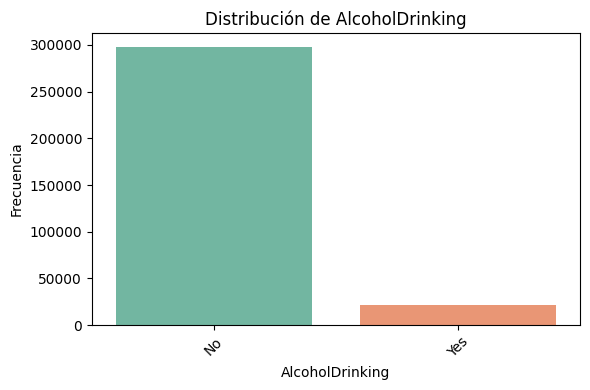

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


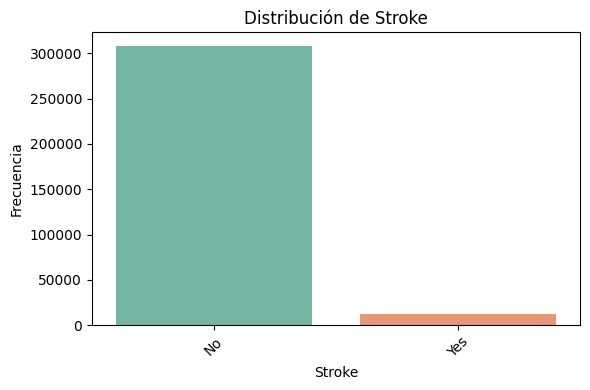

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


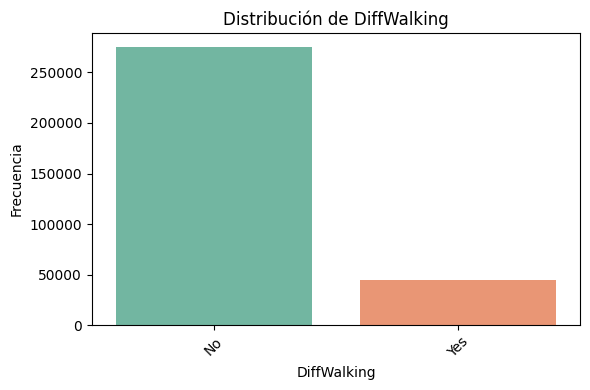

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


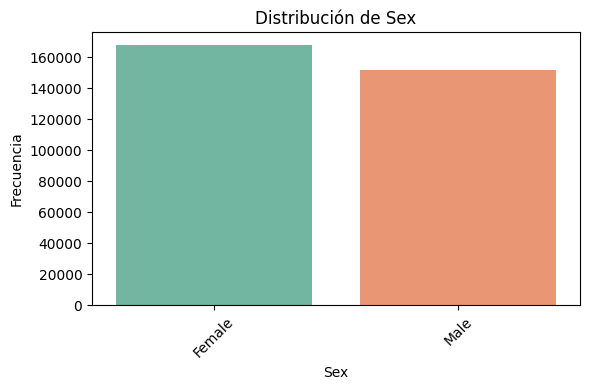

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


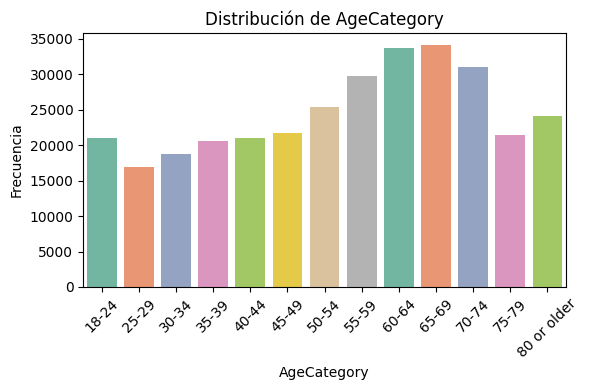

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


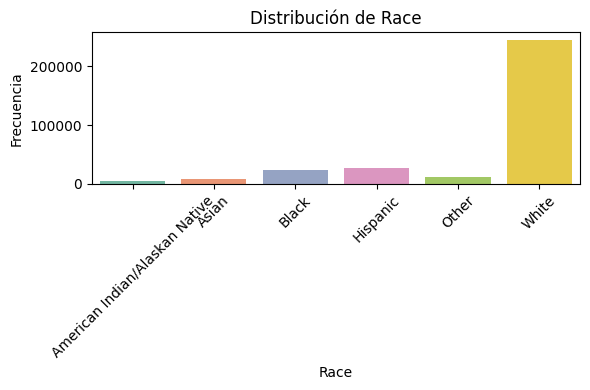

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


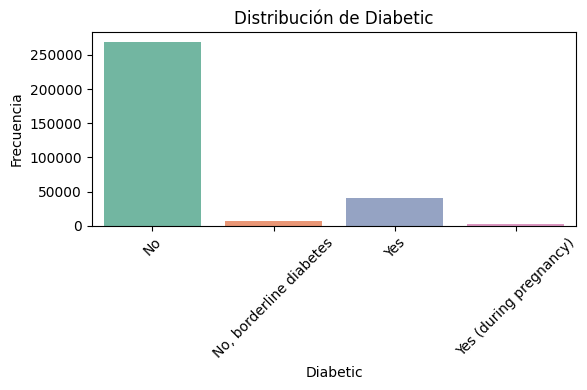

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


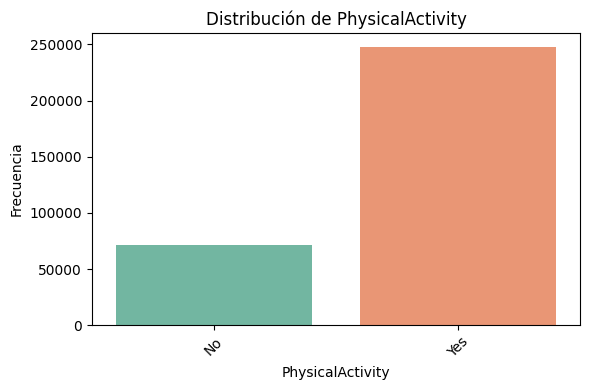

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


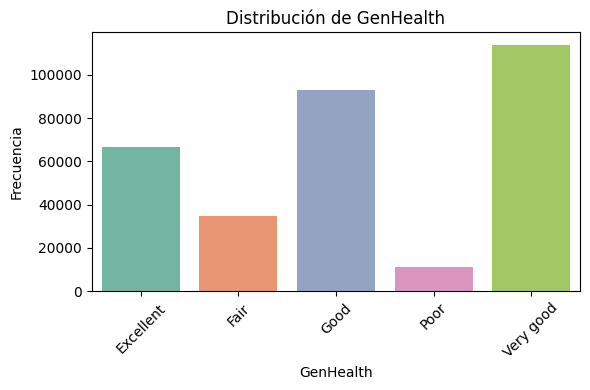

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


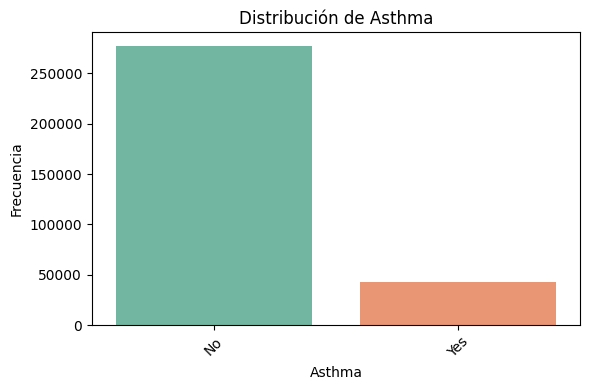

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


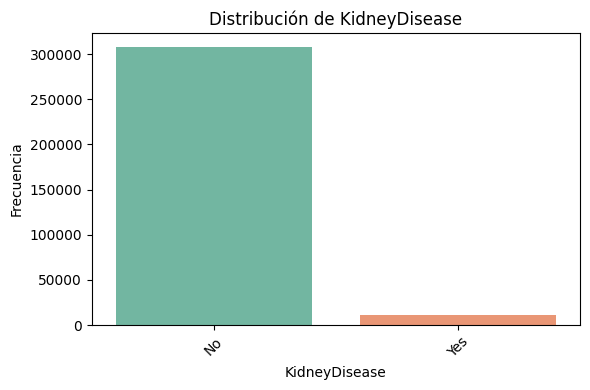

/tmp/ipython-input-4149300561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


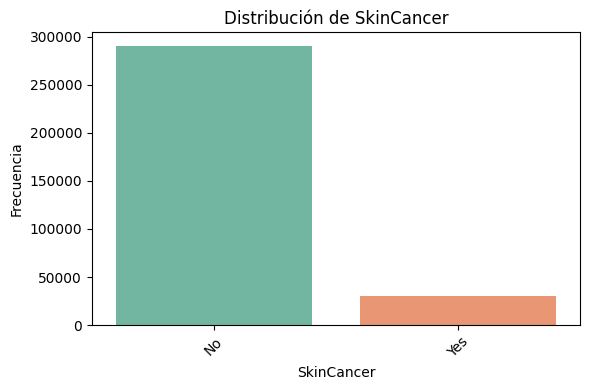

In [ ]:
#Diagrama de barras para las categoricas
cat_cols = df.select_dtypes(include='category').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [ ]:
#Distribucion de la variable objetivo
df['HeartDisease'].value_counts(normalize=True) * 100

,proportion
HeartDisease,
No,91.440454
Yes,8.559546


## Limpieza de nulos

In [ ]:
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
df[df.isnull().any(axis=1)].head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  category
 1   BMI               319795 non-null  float64 
 2   Smoking           319795 non-null  category
 3   AlcoholDrinking   319795 non-null  category
 4   Stroke            319795 non-null  category
 5   PhysicalHealth    319795 non-null  float64 
 6   MentalHealth      319795 non-null  float64 
 7   DiffWalking       319795 non-null  category
 8   Sex               319795 non-null  category
 9   AgeCategory       319795 non-null  category
 10  Race              319795 non-null  category
 11  Diabetic          319795 non-null  category
 12  PhysicalActivity  319795 non-null  category
 13  GenHealth         319795 non-null  category
 14  SleepTime         319795 non-null  float64 
 15  Asthma            319795 non-null  category
 16  Ki

## Analisis de Correlaciones para Redundancia

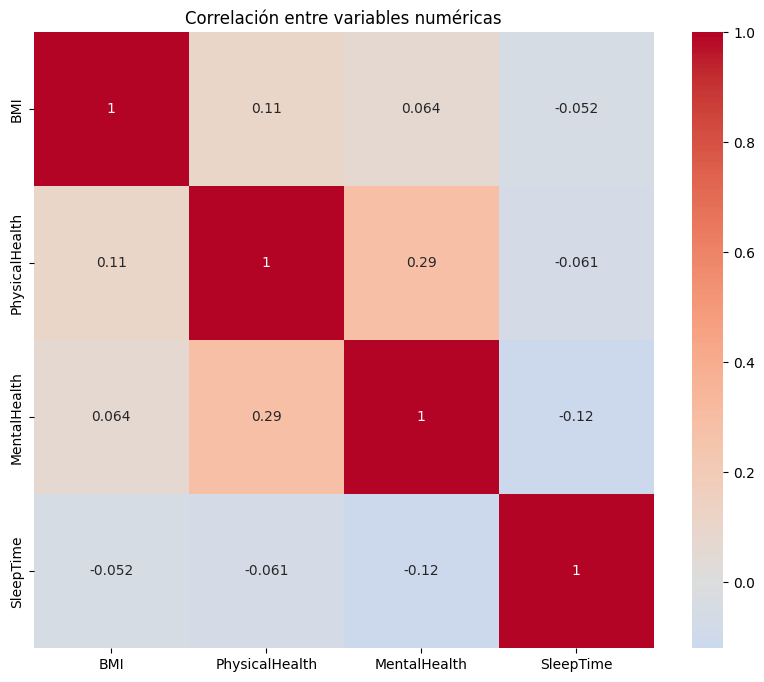

In [ ]:
#Redundancia para variables numericas
# Filtramos solo variables numéricas
num_vars = df.select_dtypes(include=['number'])

# Calculamos la matriz de correlación
corr = num_vars.corr(method='pearson')

# Mostramos un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación entre variables numéricas")
plt.show()

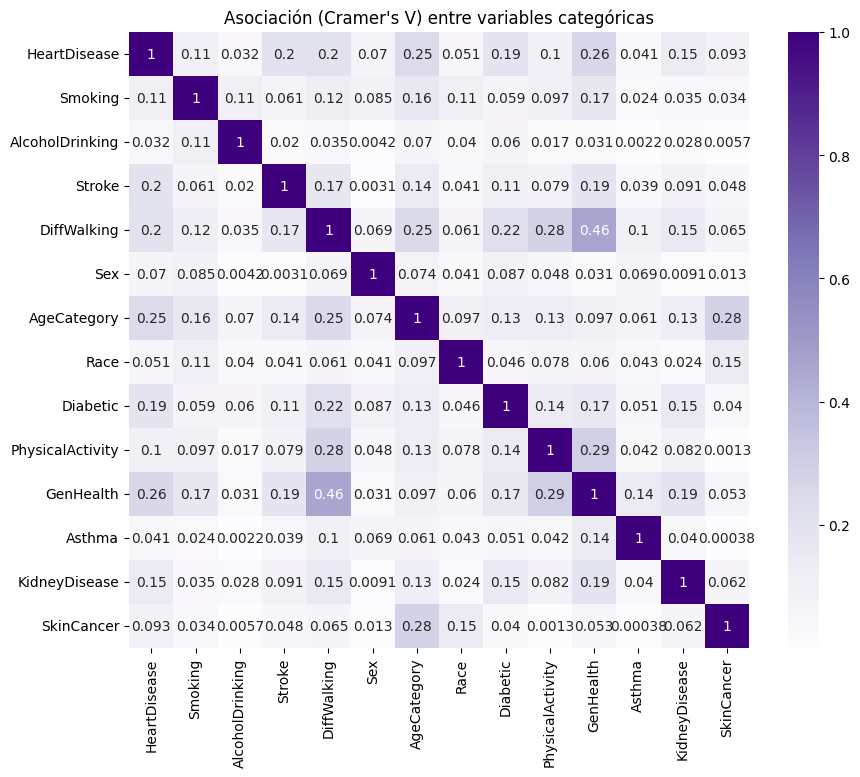

In [ ]:
#Redundancia entre variables categoricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Creamos la matriz de Cramer's V
cat_vars = df.select_dtypes(include='category').columns
cramer_matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)

for var1 in cat_vars:
    for var2 in cat_vars:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])

cramer_matrix = cramer_matrix.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(cramer_matrix, annot=True, cmap='Purples')
plt.title("Asociación (Cramer's V) entre variables categóricas")
plt.show()

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

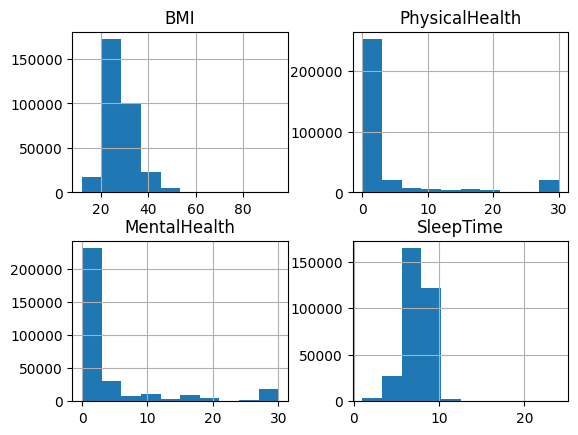

In [ ]:
df.hist()

division 70-30 , se balancea solo el 70%

In [ ]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# División 70-30 (entrenamiento-prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,          # 30% de los datos para prueba
    random_state=42,        # Semilla para reproducibilidad
    stratify=y              # Mantiene la proporción de clases
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Distribución en entrenamiento:\n", y_train.value_counts(normalize=True))
print("Distribución en prueba:\n", y_test.value_counts(normalize=True))


Tamaño del conjunto de entrenamiento: (223856, 17)
Tamaño del conjunto de prueba: (95939, 17)
Distribución en entrenamiento:
 HeartDisease
No     0.914405
Yes    0.085595
Name: proportion, dtype: float64
Distribución en prueba:
 HeartDisease
No     0.914404
Yes    0.085596
Name: proportion, dtype: float64


##Balanceo

In [ ]:
# Identificar columnas categóricas y numéricas
categorical_features = X_train.select_dtypes(include='category').columns
numerical_features = X_train.select_dtypes(include=np.number).columns

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ],
    remainder='drop'
)

# Aplicar preprocesamiento al conjunto de entrenamiento
X_train_processed = preprocessor.fit_transform(X_train)

# Obtener nombres de columnas después del OneHotEncoder
encoded_cols = preprocessor.get_feature_names_out()

# Convertir a DataFrame con nombres correctos
X_train_processed_df = pd.DataFrame(
    X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed,
    columns=encoded_cols
)

# Aplicar SMOTE con balanceo al 20%
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed_df, y_train)

# Asegurar que y_train_bal sea una Serie de pandas
y_train_bal = pd.Series(y_train_bal, name='HeartDisease')

# Mostrar resultados
print("Distribución original:\n", y_train.value_counts(), "\n")
print("Distribución después del balanceo (100%):\n", y_train_bal.value_counts())
print("\nForma de X_train_bal después del balanceo y codificación:", X_train_bal.shape)

Distribución original:
 HeartDisease
No     204695
Yes     19161
Name: count, dtype: int64 

Distribución después del balanceo (100%):
 HeartDisease
No     204695
Yes    204695
Name: count, dtype: int64

Forma de X_train_bal después del balanceo y codificación: (409390, 50)


In [ ]:
#  Obtener nombres de columnas del preprocesador
encoded_cols = preprocessor.get_feature_names_out()

# Convertir a DataFrame asegurando la forma correcta
X_train_bal_df = pd.DataFrame(
    X_train_bal,
    columns=encoded_cols  # deben coincidir en cantidad con X_train_bal.shape[1]
)

# Añadir la variable objetivo balanceada
X_train_bal_df['HeartDisease'] = y_train_bal.values

# Revisar
print(X_train_bal_df.head())
print("\nForma:", X_train_bal_df.shape)


   cat__Smoking_No  cat__Smoking_Yes  cat__AlcoholDrinking_No  \
0              0.0               1.0                      1.0   
1              1.0               0.0                      1.0   
2              1.0               0.0                      1.0   
3              1.0               0.0                      1.0   
4              0.0               1.0                      1.0   

   cat__AlcoholDrinking_Yes  cat__Stroke_No  cat__Stroke_Yes  \
0                       0.0             1.0              0.0   
1                       0.0             1.0              0.0   
2                       0.0             1.0              0.0   
3                       0.0             1.0              0.0   
4                       0.0             1.0              0.0   

   cat__DiffWalking_No  cat__DiffWalking_Yes  cat__Sex_Female  cat__Sex_Male  \
0                  1.0                   0.0              1.0            0.0   
1                  1.0                   0.0              0.0   

##Creacion de Nuevas Variables

In [ ]:
# BMI_Age_Interaction
#efecto combinado del IMC y la edad. Un IMC alto es más riesgoso en personas mayores.
X['BMI_Age_Interaction'] = X['BMI'] * X['AgeCategory'].cat.codes

In [ ]:
# Health_Conditions_Count
#Suma de condiciones presentes: Stroke (Derrame cerebral),Diabetes, Enfermedad renal,Asma y Cáncer de piel

X['Health_Conditions_Count'] = (
    (X['Stroke'] == 'Yes').astype(int) +
    (X['Diabetic'].isin(['Yes', 'Yes (during pregnancy)'])).astype(int) +
    (X['KidneyDisease'] == 'Yes').astype(int) +
    (X['Asthma'] == 'Yes').astype(int) +
    (X['SkinCancer'] == 'Yes').astype(int)
)

In [ ]:
#Suma de hábitos poco saludables: Fuma, Bebe Alcohol y No Hace Actividad Fisica
X['Unhealthy_Lifestyle'] = (
    (X['Smoking'] == 'Yes').astype(int) +
    (X['AlcoholDrinking'] == 'Yes').astype(int) +
    (X['PhysicalActivity'] == 'No').astype(int)
)

In [ ]:
#Conversión de categorías a números:
#Poor (Mala) = 1
#Fair (Regular) = 2
#Good (Buena) = 3
#Very good (Muy buena) = 4
#Excellent (Excelente) = 5
health_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
X['GenHealth_Score'] = X['GenHealth'].map(health_mapping).astype('float64')  # ← AGREGAR .astype('float64')

In [ ]:
#Relación entre calidad de salud y horas de sueño.
X['Health_Sleep_Ratio'] = X['GenHealth_Score'] / (X['SleepTime'] + 1)

In [ ]:
# 6. BMI_Category
#Clasificación según IMC:
#Underweight (Bajo peso): IMC < 18.5
#Normal: 18.5 ≤ IMC < 25
#Overweight (Sobrepeso): 25 ≤ IMC < 30
#Obese (Obeso): IMC ≥ 30

X['BMI_Category'] = pd.cut(
    X['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [ ]:
#1 si edad ≥ 65 años (categorías: 65-69, 70-74, 75-79, 80+)
#0 en caso contrario
#Interpretación: Indicador de población adulta mayor.

age_senior = ['65-69', '70-74', '75-79', '80 or older']
X['Is_Senior'] = X['AgeCategory'].isin(age_senior).astype(int)

In [ ]:
#ías totales con problemas de salud (física + mental) en los últimos 30 días.
X['Total_Unhealthy_Days'] = X['PhysicalHealth'] + X['MentalHealth']

In [ ]:
X['CV_Risk_Score'] = (
    X['Health_Conditions_Count'] * 2 +
    X['Unhealthy_Lifestyle'] +
    (X['DiffWalking'] == 'Yes').astype(int) * 2 +
    X['Is_Senior']
)

In [ ]:
# BMI_Activity_Risk
#Riesgo por obesidad sedentaria.
X['BMI_Activity_Risk'] = X['BMI'] * (X['PhysicalActivity'] == 'No').astype(int)

In [ ]:
nuevas_vars = [
    'BMI_Age_Interaction',
    'Health_Conditions_Count',
    'Unhealthy_Lifestyle',
    'GenHealth_Score',
    'Health_Sleep_Ratio',
    'BMI_Category',
    'Is_Senior',
    'Total_Unhealthy_Days',
    'CV_Risk_Score',
    'BMI_Activity_Risk'
]

print("NUEVAS VARIABLES CREADAS:")
print(X[nuevas_vars].head(10))

print("TIPOS DE DATOS DE NUEVAS VARIABLES:")
print(X[nuevas_vars].dtypes)

NUEVAS VARIABLES CREADAS:
   BMI_Age_Interaction  Health_Conditions_Count  Unhealthy_Lifestyle  \
0               116.20                        3                    1   
1               244.08                        1                    0   
2               239.22                        2                    1   
3               266.31                        1                    1   
4                94.84                        0                    0   
5               317.57                        0                    2   
6               216.30                        2                    0   
7               379.68                        2                    2   
8               317.40                        1                    1   
9               366.21                        0                    0   

   GenHealth_Score  Health_Sleep_Ratio BMI_Category  Is_Senior  \
0              4.0            0.666667  Underweight          0   
1              4.0            0.500000       Norm

##Descargar

Datos balanceados para entrenar el modelo

In [ ]:
# Obtener los nombres de las columnas luego del preprocesamiento
encoded_cols = preprocessor.get_feature_names_out()

# Reconstruir DataFrame con las columnas codificadas y balanceadas
df_final = pd.DataFrame(X_train_bal, columns=encoded_cols)
df_final['HeartDisease'] = y_train_bal.values

# Guardar todo en un solo archivo CSV
df_final.to_csv('heart_disease_prepared((1).csv', index=False)

print("Archivo 'heart_disease_prepared.csv' creado correctamente.")
print("Tamaño final del dataset preparado:", df_final.shape)
print("Distribución de clases:\n", df_final['HeartDisease'].value_counts())


Archivo 'heart_disease_prepared.csv' creado correctamente.
Tamaño final del dataset preparado: (409390, 51)
Distribución de clases:
 HeartDisease
No     204695
Yes    204695
Name: count, dtype: int64


In [ ]:
df_final.head(10)

,cat__Smoking_No,cat__Smoking_Yes,cat__AlcoholDrinking_No,cat__AlcoholDrinking_Yes,cat__Stroke_No,cat__Stroke_Yes,cat__DiffWalking_No,cat__DiffWalking_Yes,cat__Sex_Female,cat__Sex_Male,...,cat__Asthma_Yes,cat__KidneyDisease_No,cat__KidneyDisease_Yes,cat__SkinCancer_No,cat__SkinCancer_Yes,num__BMI,num__PhysicalHealth,num__MentalHealth,num__SleepTime,HeartDisease
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,23.44,0.0,1.0,7.0,No
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,23.11,0.0,0.0,7.0,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,35.51,2.0,1.0,7.0,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,21.79,0.0,0.0,8.0,No
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,47.59,30.0,20.0,6.0,No
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,26.54,0.0,0.0,2.0,No
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,22.81,0.0,4.0,8.0,No
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,28.19,0.0,4.0,8.0,No
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,26.09,0.0,0.0,5.0,Yes
9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,23.38,30.0,0.0,5.0,No


Datos originales de prueba

In [ ]:
# Aplicar el mismo preprocesamiento al conjunto de prueba
X_test_processed = preprocessor.transform(X_test)

# Convertir a DataFrame con las mismas columnas codificadas
X_test_processed_df = pd.DataFrame(
    X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed,
    columns=encoded_cols
)

# Agregar la variable objetivo (y_test)
df_test = pd.DataFrame(X_test_processed_df)
df_test['HeartDisease'] = y_test.values

# Guardar el conjunto de prueba en un archivo CSV
df_test.to_csv('heart_disease_test.csv', index=False)

# Confirmar resultados
print("Archivo 'heart_disease_test.csv' creado correctamente.")
print("Tamaño del conjunto de prueba:", df_test.shape)
print("Distribución de clases en test:\n", df_test['HeartDisease'].value_counts())


Archivo 'heart_disease_test.csv' creado correctamente.
Tamaño del conjunto de prueba: (95939, 51)
Distribución de clases en test:
 HeartDisease
No     87727
Yes     8212
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. División 70-30 (sin tocar las variables categóricas)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Distribución original en entrenamiento:")
print(y_train.value_counts())
print(f"\nForma de X_train antes del balanceo: {X_train.shape}")

# 2. Para SMOTE, necesitamos convertir temporalmente a numérico
# pero luego restauramos las categorías originales
X_train_numeric = X_train.copy()

# Convertir categóricas a códigos numéricos temporalmente
categorical_cols = X_train.select_dtypes(include='category').columns
category_mappings = {}

for col in categorical_cols:
    category_mappings[col] = X_train[col].cat.categories
    X_train_numeric[col] = X_train[col].cat.codes

# 3. Aplicar SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_bal_numeric, y_train_bal = smote.fit_resample(X_train_numeric, y_train)

# 4. Restaurar las variables categóricas originales
X_train_bal = X_train_bal_numeric.copy()

for col in categorical_cols:
    # Convertir los códigos de vuelta a categorías
    X_train_bal[col] = pd.Categorical.from_codes(
        X_train_bal_numeric[col].astype(int),
        categories=category_mappings[col]
    )

# Asegurar que y_train_bal sea una Serie
y_train_bal = pd.Series(y_train_bal, name='HeartDisease')

# 5. Mostrar resultados
print("\n" + "="*50)
print("Distribución después del balanceo:")
print(y_train_bal.value_counts())
print(f"\nForma de X_train_bal: {X_train_bal.shape}")
print(f"\nTipos de datos en X_train_bal:")
print(X_train_bal.dtypes)
print(f"\n¿Las columnas categóricas siguen siendo 'category'? {X_train_bal.select_dtypes(include='category').columns.tolist()}")

# Verificar algunas filas
print("\nPrimeras filas de X_train_bal:")
print(X_train_bal.head())

Distribución original en entrenamiento:
HeartDisease
No     204695
Yes     19161
Name: count, dtype: int64

Forma de X_train antes del balanceo: (223856, 17)

Distribución después del balanceo:
HeartDisease
No     204695
Yes    204695
Name: count, dtype: int64

Forma de X_train_bal: (409390, 17)

Tipos de datos en X_train_bal:
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
dtype: object

¿Las columnas categóricas siguen siendo 'category'? ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActi

In [ ]:
import pandas as pd

# Crear archivo combinado de entrenamiento
train_bal_combined = X_train_bal.copy()
train_bal_combined['HeartDisease'] = y_train_bal
train_bal_combined.to_csv('heart_disease_train.csv', index=False)
print("✓ heart_disease_train.csv descargado")

# Crear archivo combinado de prueba
test_combined = X_test.copy()
test_combined['HeartDisease'] = y_test
test_combined.to_csv('heart_disease_test.csv', index=False)
print("✓ heart_disease_test.csv descargado")

print("\n" + "="*50)
print("RESUMEN DE ARCHIVOS DESCARGADOS:")
print("="*50)
print(f"1. heart_disease_train.csv - {train_bal_combined.shape[0]} filas × {train_bal_combined.shape[1]} columnas")
print(f"   - Balanceado al 100% con SMOTE")
print(f"   - Variables categóricas originales (sin dummies)")
print(f"\n2. heart_disease_test.csv - {test_combined.shape[0]} filas × {test_combined.shape[1]} columnas")
print(f"   - Sin balancear (distribución original)")
print(f"   - Variables categóricas originales (sin dummies)")

# Mostrar distribución de clases
print("\n" + "="*50)
print("DISTRIBUCIÓN DE CLASES:")
print("="*50)
print("Train (balanceado):")
print(train_bal_combined['HeartDisease'].value_counts())
print("\nTest (original):")
print(test_combined['HeartDisease'].value_counts())

✓ heart_disease_train.csv descargado
✓ heart_disease_test.csv descargado

RESUMEN DE ARCHIVOS DESCARGADOS:
1. heart_disease_train.csv - 409390 filas × 18 columnas
   - Balanceado al 100% con SMOTE
   - Variables categóricas originales (sin dummies)

2. heart_disease_test.csv - 95939 filas × 18 columnas
   - Sin balancear (distribución original)
   - Variables categóricas originales (sin dummies)

DISTRIBUCIÓN DE CLASES:
Train (balanceado):
HeartDisease
No     204695
Yes    204695
Name: count, dtype: int64

Test (original):
HeartDisease
No     87727
Yes     8212
Name: count, dtype: int64


##